In [49]:
import torch
print(torch.__version__)

1.12.0+cu113


In [50]:
import torchvision
from torchvision.datasets import MNIST

In [51]:
# Download dataset from MNIST library
dataset = MNIST(root='data/', download=True)

In [4]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F7C337FBB50>, 5)

5


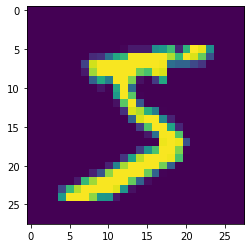

In [52]:
# Plot the first image in the dataset
import matplotlib.pyplot as plt
image, label = dataset[0]
plt.imshow(image)
print(label)

In [53]:
dataset = MNIST(root='data/', train=True, transform=torchvision.transforms.ToTensor())

In [54]:
dataset[0][0].shape

torch.Size([1, 28, 28])

In [55]:
# Split data into training and validation sets
trainData, valData = torch.utils.data.random_split(dataset, [50000, 10000])
print(len(trainData), len(valData))

50000 10000


In [56]:
# Initialize data loaders for training and validation data
trainDataLoader = torch.utils.data.DataLoader(trainData, batch_size=100, shuffle=True)
valDataLoader = torch.utils.data.DataLoader(trainData, batch_size=100, shuffle=True)

## **Logisitc Regression Model**

In [57]:
import torch.nn as nn

class LogisticRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(784, 10)
  
  def forward(self, x):
    x = x.reshape(-1, 784)
    y = self.linear(x)
    return y


model = LogisticRegression()
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [58]:
import numpy as np

# **Training the Model**

In [59]:
def train(model, train_loader, learningRate, epochs, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(), learningRate)
  for epoch in range(epochs):
    lossVals = []
    for batch in train_loader:
      images, labels = batch
      predictedLabels = model(images)
      loss = nn.functional.cross_entropy(predictedLabels, labels)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      lossVals.append(loss.item())
    
    meanLoss = np.array(lossVals)
    meanLoss = np.mean(meanLoss)
    print('epoch [{}]: loss = {}'.format(epoch + 1, meanLoss))

    
  print('Model has been trained.')

In [60]:
train(model, trainDataLoader, 0.001, 20)

epoch [1]: loss = 2.086831640481949
epoch [2]: loss = 1.7140145514011382
epoch [3]: loss = 1.4573479359149932
epoch [4]: loss = 1.2768660690784455
epoch [5]: loss = 1.146087913274765
epoch [6]: loss = 1.0480396589040757
epoch [7]: loss = 0.9722254793643952
epoch [8]: loss = 0.9119028146266938
epoch [9]: loss = 0.8628043911457062
epoch [10]: loss = 0.8220056629180909
epoch [11]: loss = 0.7875673835277557
epoch [12]: loss = 0.7580485674142837
epoch [13]: loss = 0.7324520791769028
epoch [14]: loss = 0.710017936706543
epoch [15]: loss = 0.690166493177414
epoch [16]: loss = 0.6724707444906235
epoch [17]: loss = 0.6565712810754776
epoch [18]: loss = 0.6422096264958381
epoch [19]: loss = 0.6291527315378189
epoch [20]: loss = 0.6172154567241669
Model has been trained.


# **Validating the Model**

In [61]:
# Compute the model's accuracy
def accuracy(output, labels):
  _, predictions = torch.max(output, dim=1)
  return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))

In [62]:
def validate(model, val_loader):

  for batch in val_loader:
    validationArr = []
    images, labels = batch
    predictedLabels = model(images)
    validationArr.append(accuracy(predictedLabels, labels).item())
  
  validationArr = np.array(validationArr)
  meanAccuracy = np.mean(validationArr)
  
  return meanAccuracy
  

In [63]:
validationAccuracy = validate(model, valDataLoader)
validationAccuracy

0.8999999761581421

## **Testing the Model**

In [64]:
# Download the test dataset
testDataset = MNIST(root='data/', train=False, transform=torchvision.transforms.ToTensor())

7


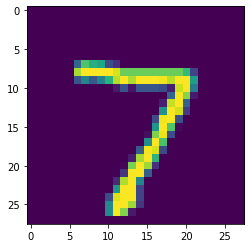

In [65]:
# Plot the first image of the test dataset
image, label = testDataset[0]
plt.imshow(image[0])
print(label)

In [66]:
# Predict the label of an image
def predictImage(img, model):
  input = img.unsqueeze(0)
  predictedLabel = model(input)
  _, prediction = torch.max(predictedLabel, dim=1)
  return prediction[0].item()

Label: 7 , Predicted: 7


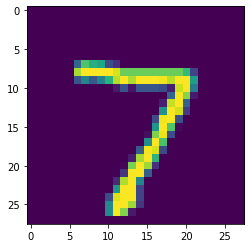

In [70]:
img, label = testDataset[0]
plt.imshow(img[0])
print('Label:', label, ', Predicted:', predictImage(img, model))

Label: 5 , Predicted: 5


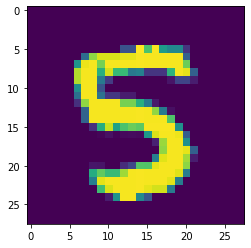

In [71]:
img, label = testDataset[120]
plt.imshow(img[0])
print('Label:', label, ', Predicted:', predictImage(img, model))

Label: 0 , Predicted: 0


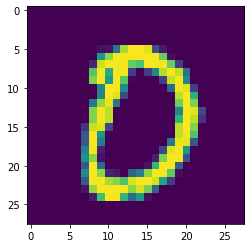

In [72]:
img, label = testDataset[194]
plt.imshow(img[0])
print('Label:', label, ', Predicted:', predictImage(img, model))

Overall, the model's accuracy as computed on the validation set was approximately **90%**.

Increasing the number of epochs would have improved the model's accuracy. However, this could have also made the model suscpetible to overfitting.

Moreover, while training the model, the loss was continuously decreasing. This means that a good learning rate (**0.001**) was chosen.